가설 세우기



데이터 분석을 하기 위해서는 어떤 문제를 알아볼 것인지 가설을 세워야 합니다. 예시로 2개의 가설을 세워보겠습니다.



첫번째, 음주 여부는 건강검진 수치와 차이가 있을까요?



두번째, 신장 또는 허리둘레의 크기가 체중가 상관관계가 있을까요?



한번 알아보겠습니다.





라이브러리 로드

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


한글폰트 설정



Google colaboratory을 사용할 경우는 ctrl(cmd) + /로 주석을 없애서 실행을 합니다.



Jupyter notebook을 사용할 떄는 다음과 같이 코드를 작성합니다.

In [11]:
import os

if os.name == 'posix':
    plt.rc("font, family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
           
plt.rc("axes", unicode_minus=False)

SyntaxError: invalid syntax (3546749851.py, line 4)

In [12]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

데이터 불러오기
건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.
공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.

건강검진정보(2018) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do
2019년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2019년 데이터에 맞게 고쳐주시면 됩니다.
2019년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [28]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

df = pd.read_csv("C:/Users/USER/data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df.shape # 100만건 데이터 연도별로 해마다 100만건 엑셀로 열면 왜 판다스로 하는지 알 수 있음 로드가 느리고 컬럼 만들거나 연산하는게 느림 판다스는 100만건 이상 데이터 분석하는게 좋다

(1000000, 34)

# 5.1 데이터 미리보기

In [31]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [33]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [45]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
10217,2017,10218,1,12,41,170.0,95.0,84.0,1.0,0.7,...,36.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# 6 기본정보보기

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [47]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [48]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 7 결측치 보기

In [50]:
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [53]:
# isnull()으로 결측치를 bool 값으로 표시하고, sum()으로 결측치의 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [54]:
df.isna()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [61]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

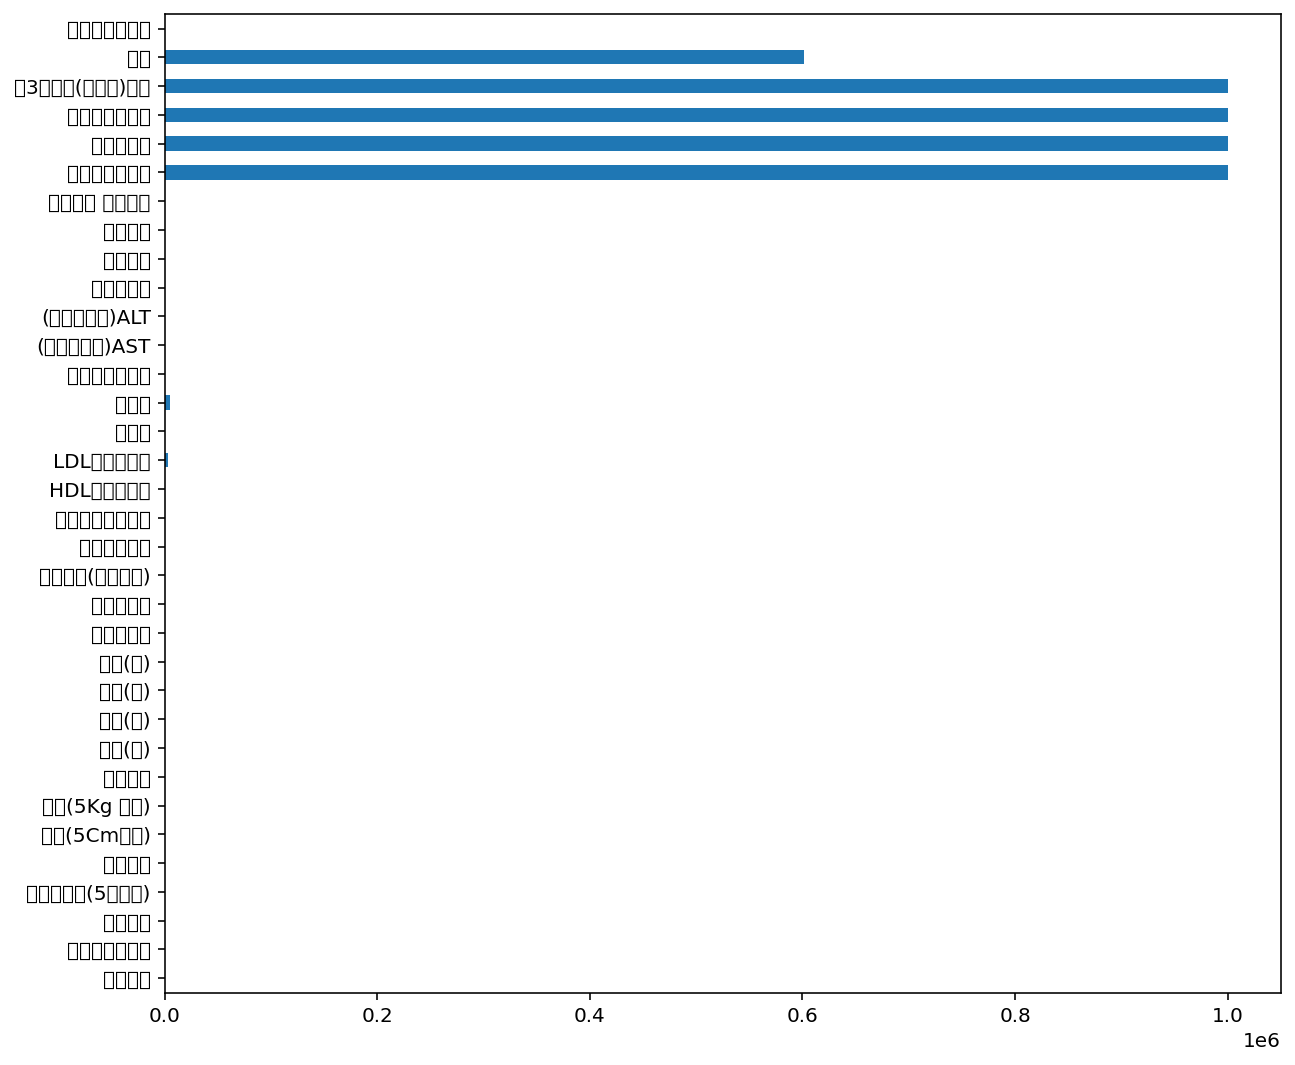

In [64]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 8 일부 데이터 요약하기

In [68]:
 # 시리즈 형태 자료구조
    df["(혈청지오티)ALT"]

0         41.0
1         13.0
2         62.0
3         24.0
4         62.0
          ... 
999995    11.0
999996    11.0
999997    13.0
999998    30.0
999999    20.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [69]:
#두개 컬럼은 리스트 형태로 감싸서 표현 [[]] 2차원의 리스트로 됨
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0


In [71]:
 # 데이터프레임 형태 자료구조
df[["(혈청지오티)ALT"]].head()
    

,(혈청지오티)ALT
0,41.0
1,13.0
2,62.0
3,24.0
4,62.0


In [72]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [73]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


# 9 value_counts로 값 집계하기

In [78]:
df["성별코드"].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [79]:
df["흡연상태"].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

# 10 groupby 와 pivot_table 사용하기

In [81]:
df.groupby(["성별코드"]).mean()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499946.580386,10.324381,34.15184,168.516441,70.211016,85.171843,1.035268,1.034448,1.032813,...,49.446249,2.058548,0.670136,0.433298,NaN,NaN,NaN,NaN,0.640683,20181126.0
2,2017.0,500061.589758,10.783424,33.25853,155.078899,55.701656,77.061441,0.915023,0.910340,1.031968,...,23.396111,1.094082,0.300790,0.359603,NaN,NaN,NaN,NaN,0.549563,20181126.0


In [82]:
df.groupby(["성별코드"]).count()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,531172,531172,531172,531172,531098,531098,531102,531047,531055,531064,...,531154,531120,530976,531172,0,0,0,0,230156,531172
2,468828,468828,468828,468828,468640,468634,468458,468665,468666,468694,...,468801,468720,468499,468828,0,0,0,0,168592,468828


In [83]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [86]:
# 성별코드와 음주여부로 그룹화
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [87]:
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [88]:
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [93]:
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

# 10 pivot_table

In [94]:
df.pivot_table(index="음주여부")

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017,20181126,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017,20181126,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [97]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [98]:
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

,가입자일련번호
성별코드,
1,531172
2,468828


In [104]:
pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [100]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc='mean')

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [103]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean","median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [105]:
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [106]:
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 11 히스토그램

100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에 groupby 또는 pivot_table로 연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화해보시길 권장합니다.

메모리 용량을 줄이기 위해서 대부분의 수치 데이터로 이루어져 있습니다.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

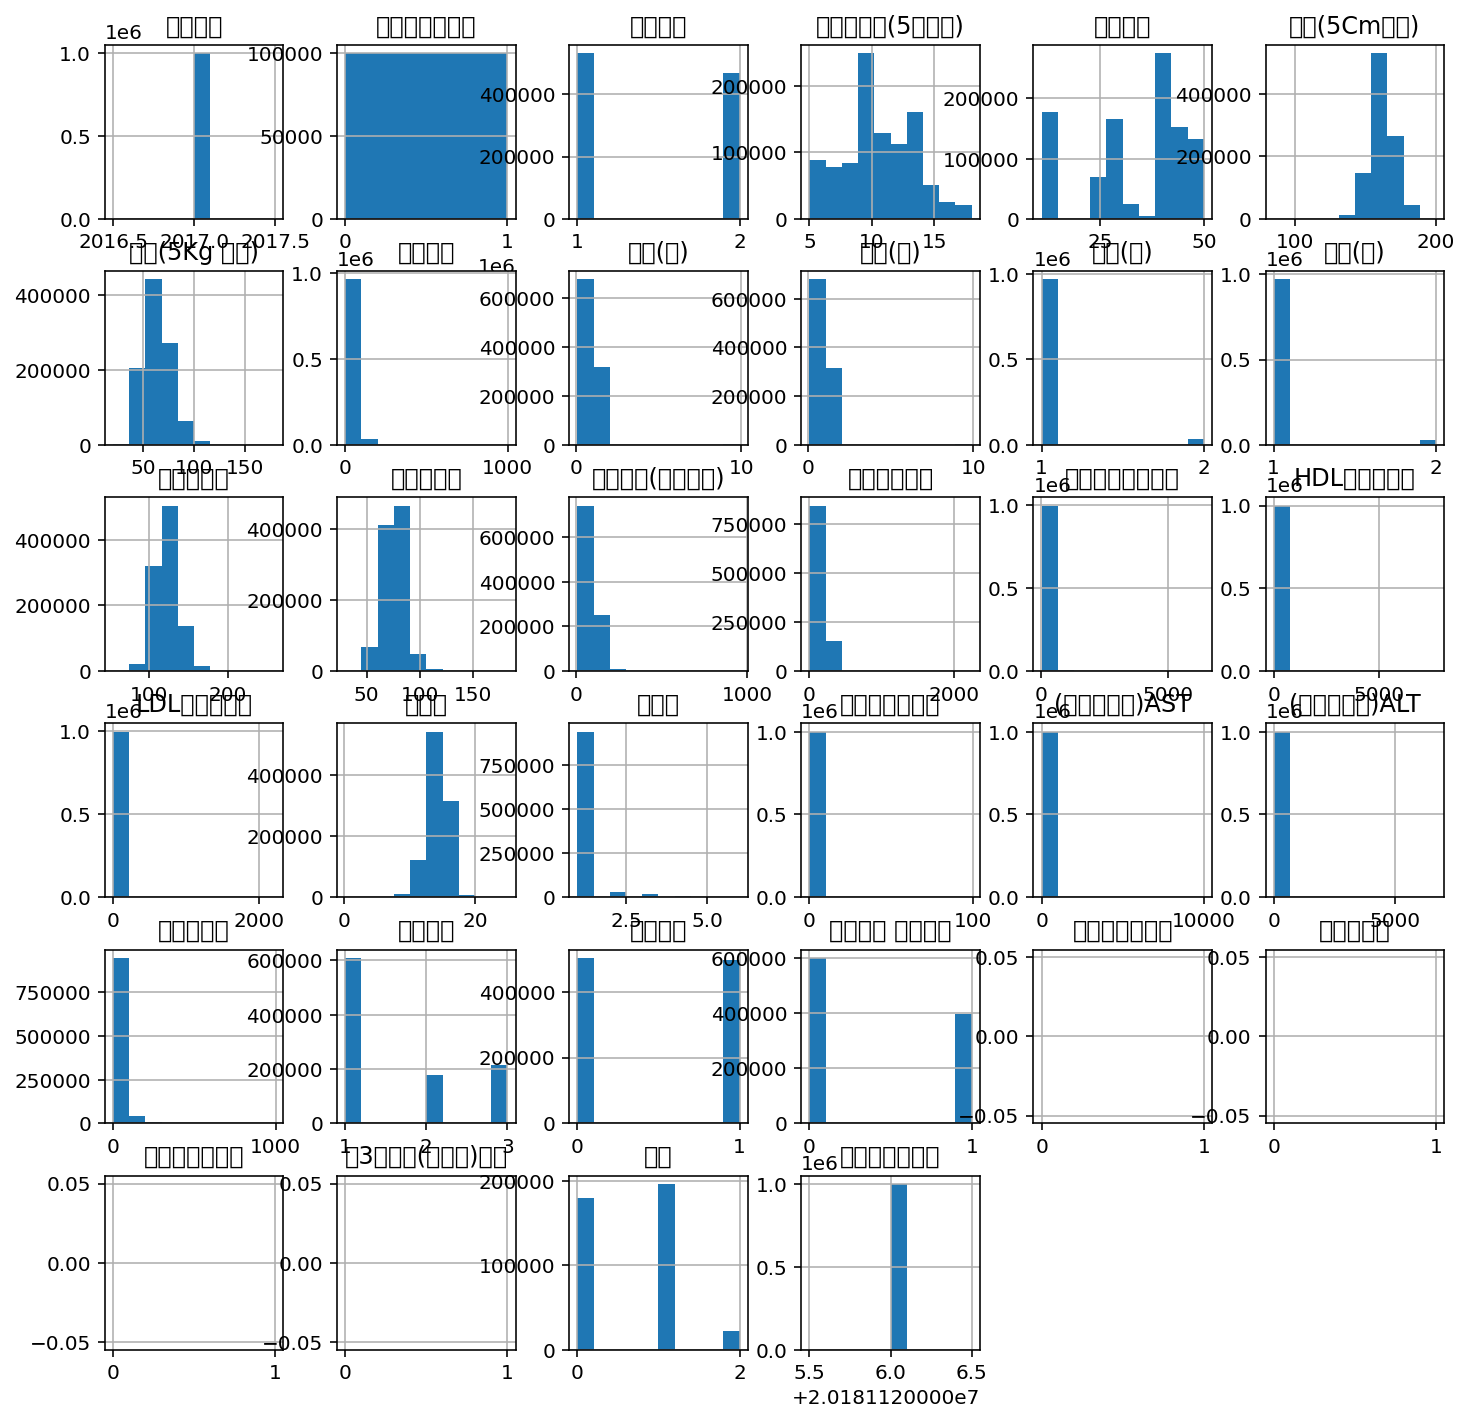

In [112]:
h = df.hist(figsize=(12,12))

In [114]:
df.iloc[:, :]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


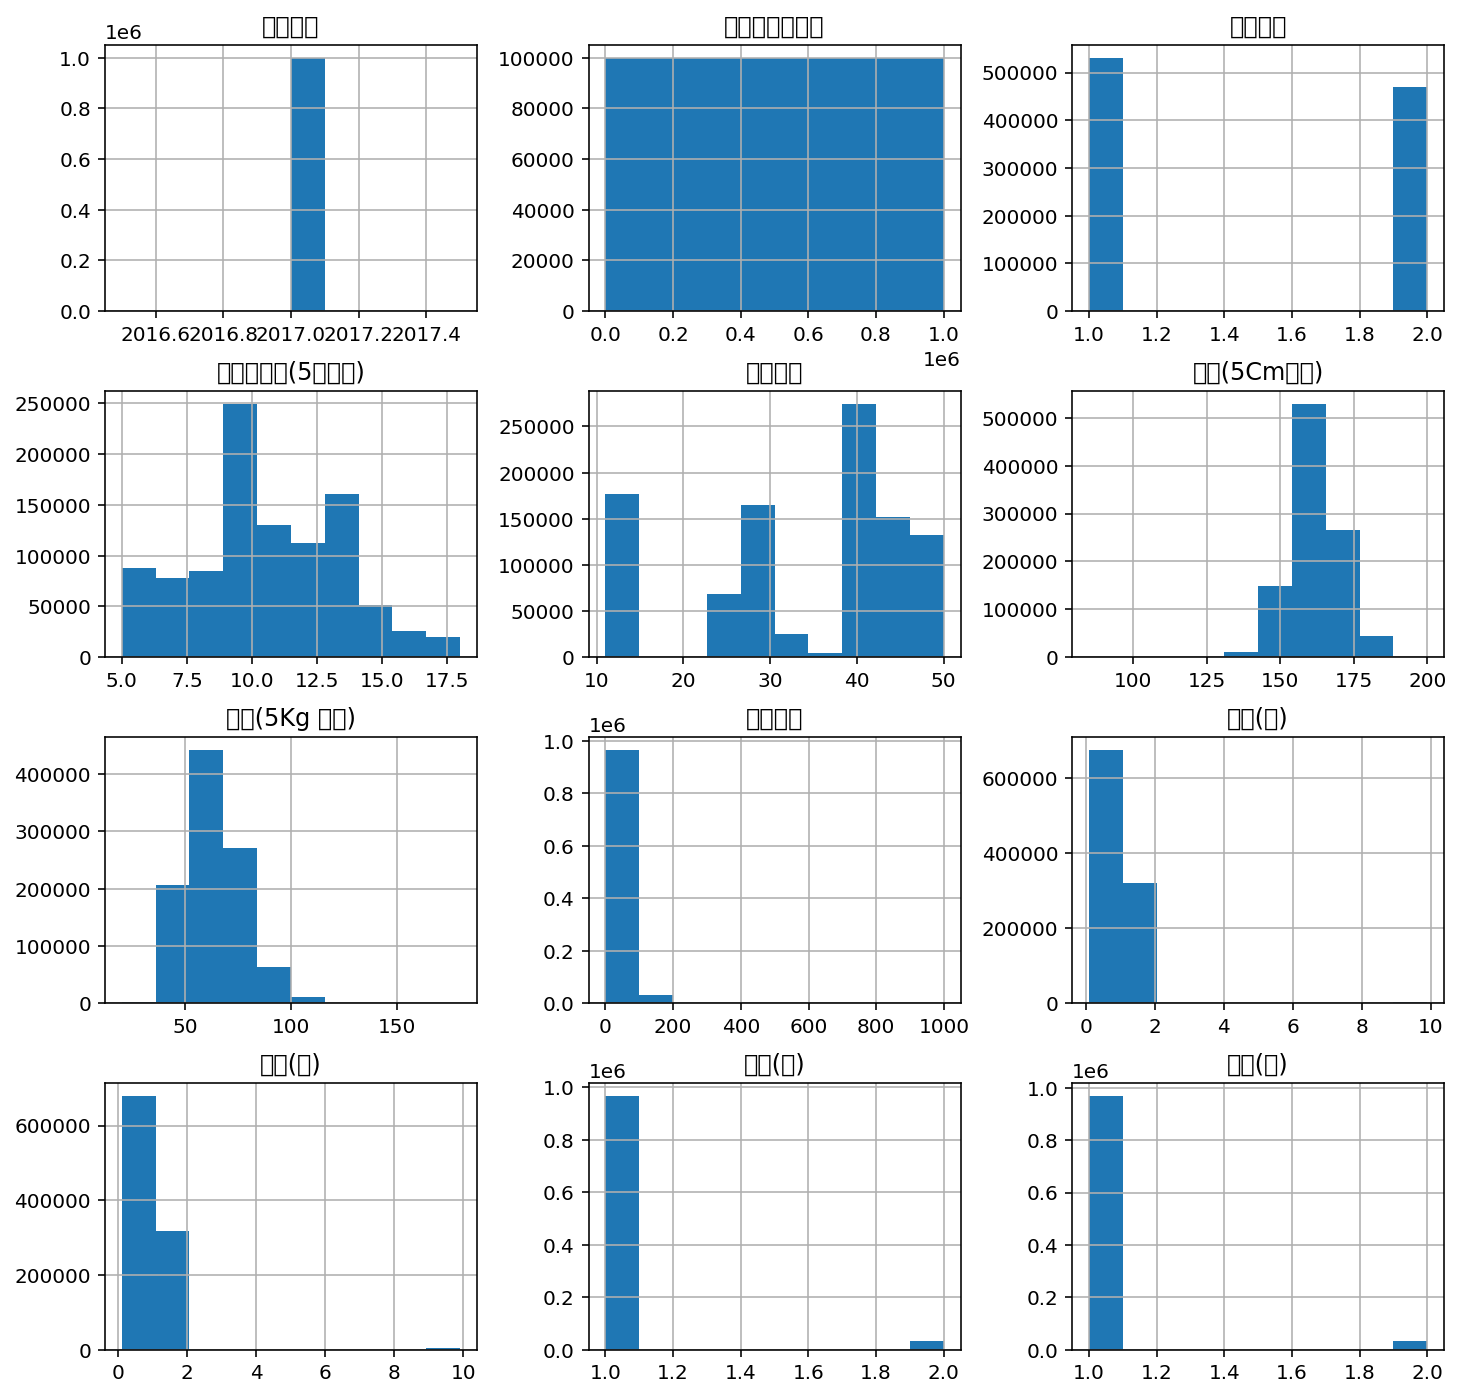

In [117]:
h = df.iloc[:, :12].hist(figsize=(12,12))

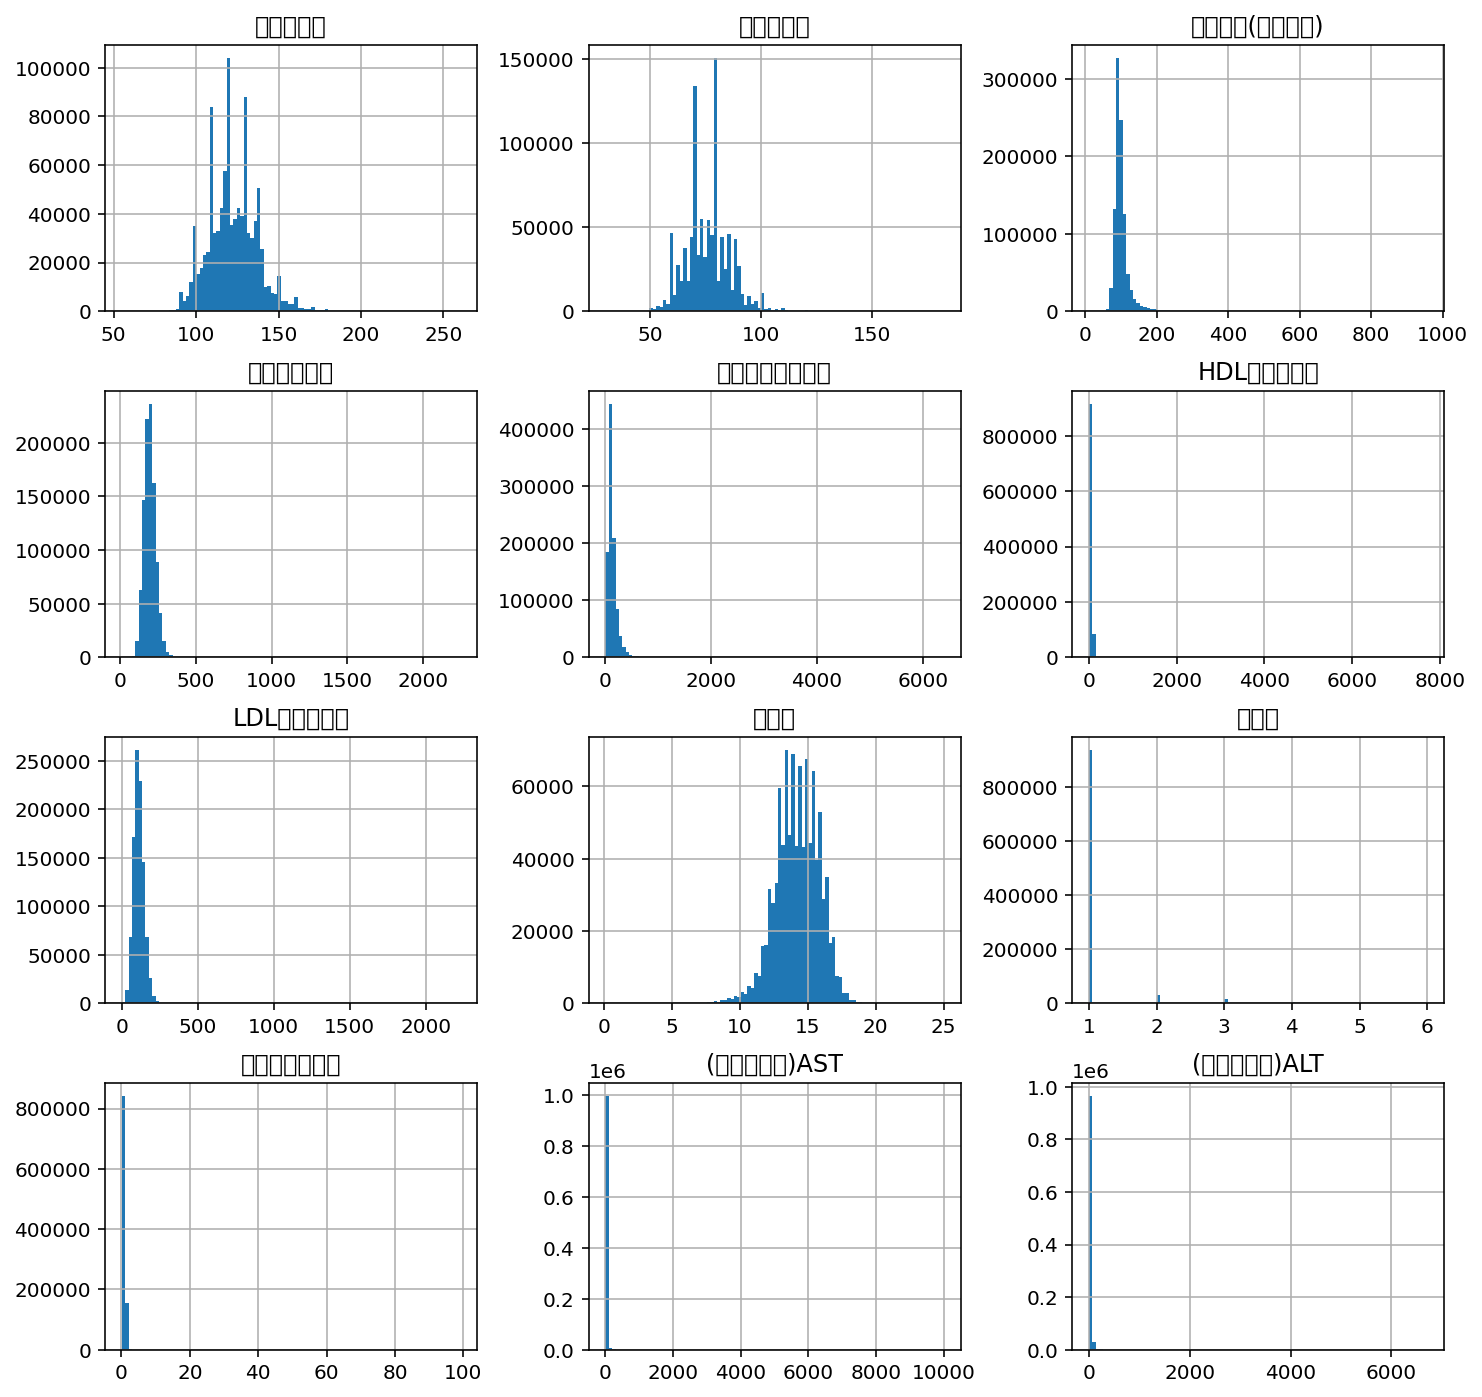

In [122]:
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

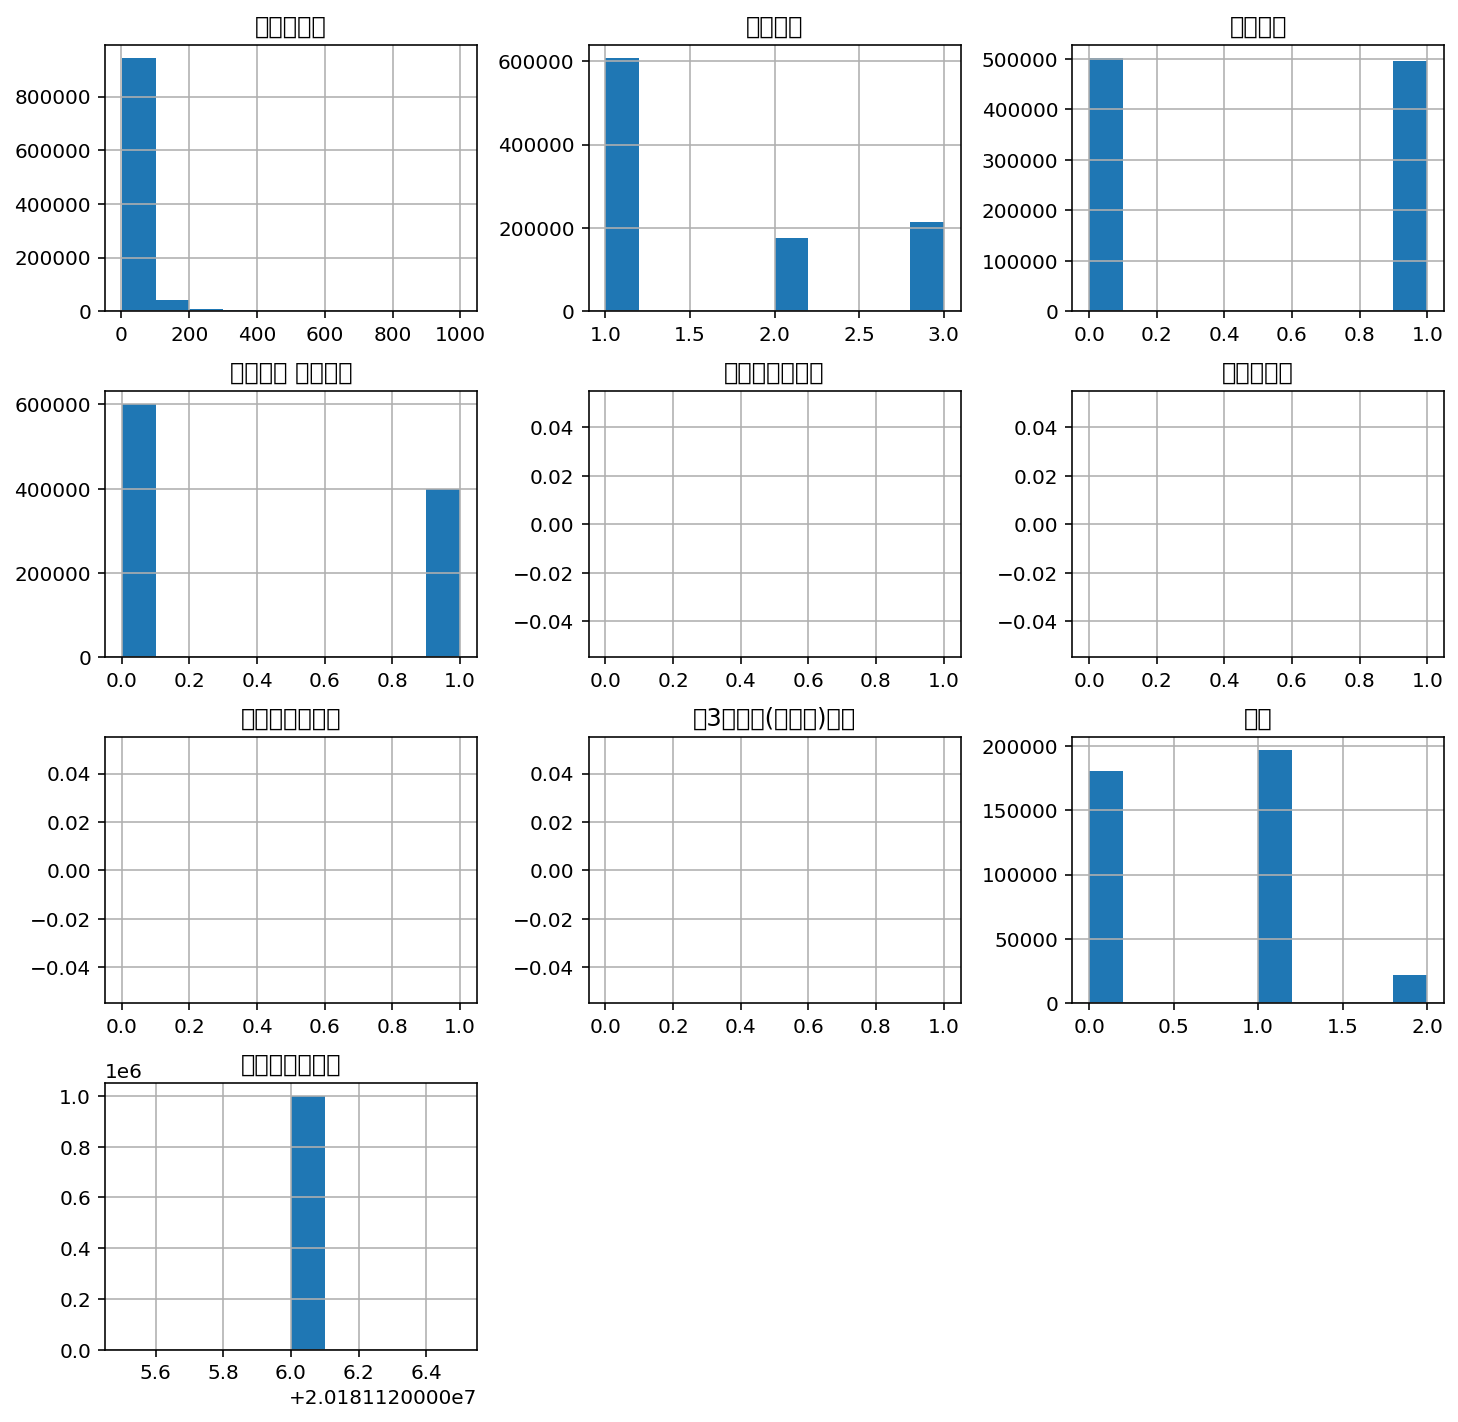

In [125]:
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=10)

seaborn



시간이 오래 걸리기 때문에 데이터의 샘플로 그려야 합니다. 1000개를 사용합니다.



random_state=1을 사용하면 1,000,000개 중 랜덤으로 정해준 개수만큼 가져옵니다.

In [135]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 14 범주형(카테고리,문자열string) 데이터 시각화

# 14.1 countplot-음주여부

In [139]:
df["음주여부"].value_counts()

0.0    502729
1.0    496746
Name: 음주여부, dtype: int64

<AxesSubplot:>

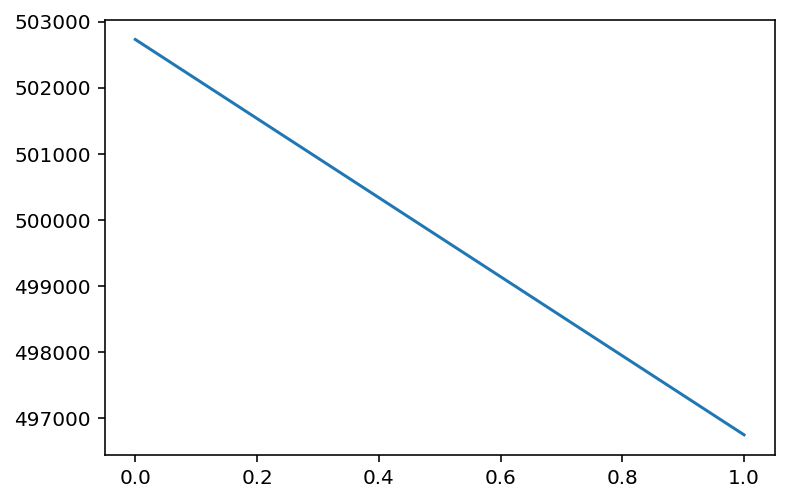

In [140]:
df["음주여부"].value_counts().plot()

<AxesSubplot:>

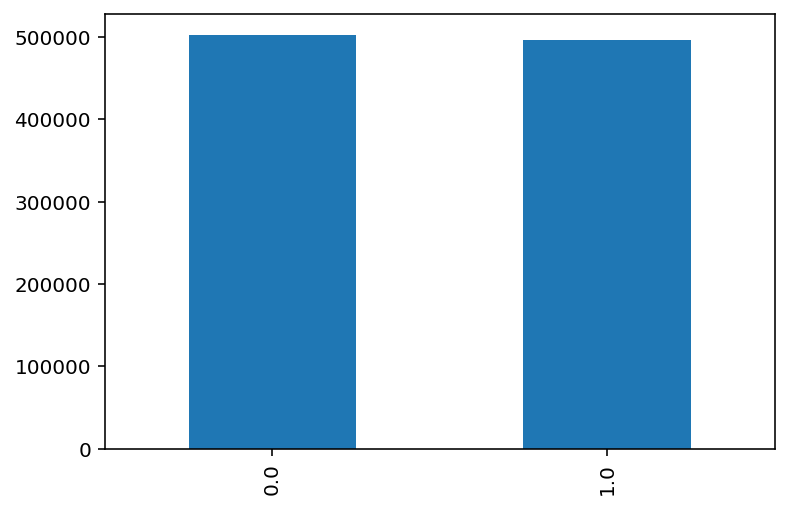

In [141]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


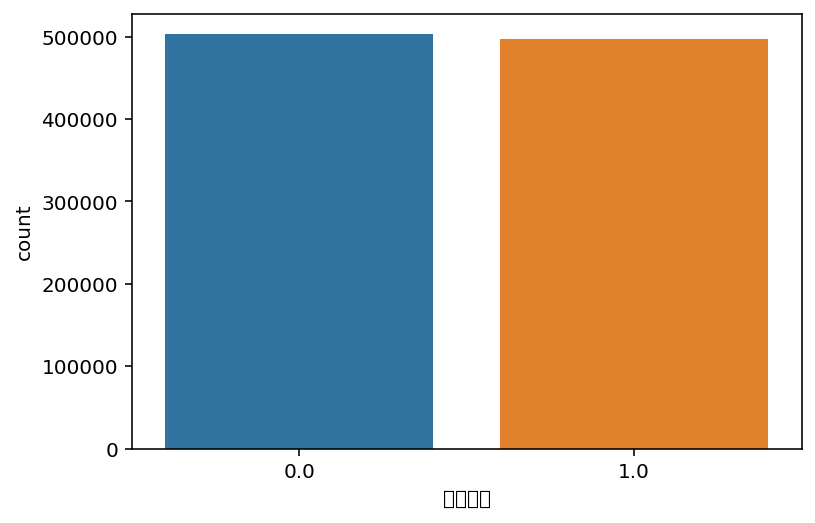

In [145]:
sns.countplot(x="음주여부",data=df)

<AxesSubplot:xlabel='성별코드', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


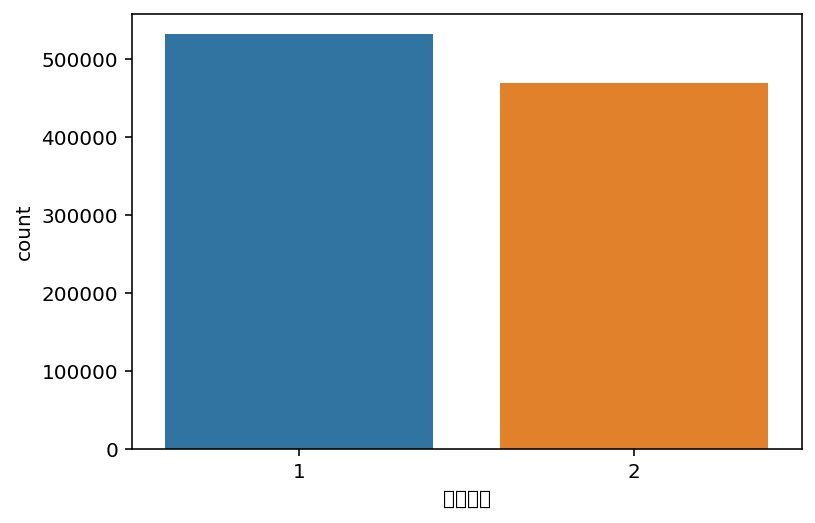

In [146]:
sns.countplot(x="성별코드",data=df)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


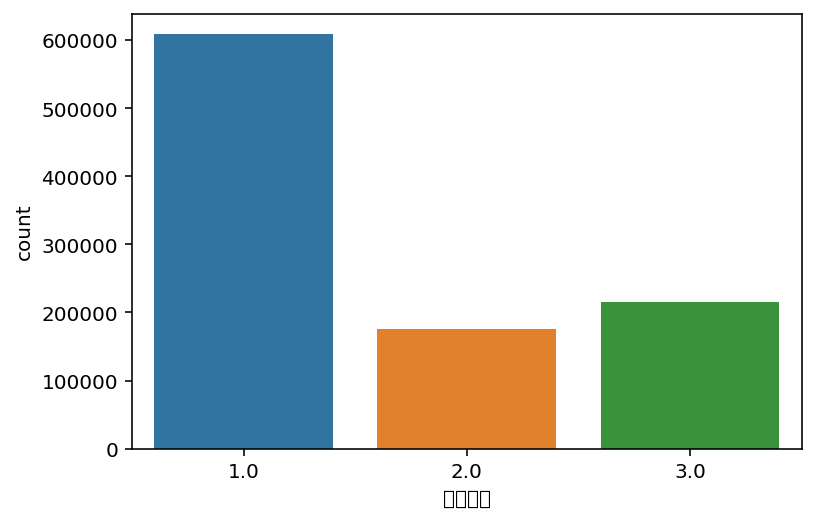

In [147]:
sns.countplot(x="흡연상태",data=df)

# 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

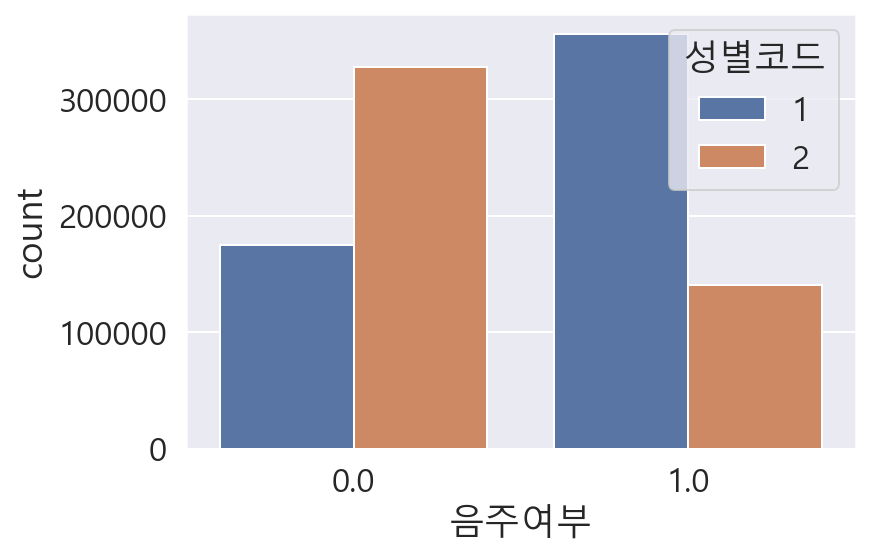

In [150]:
sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

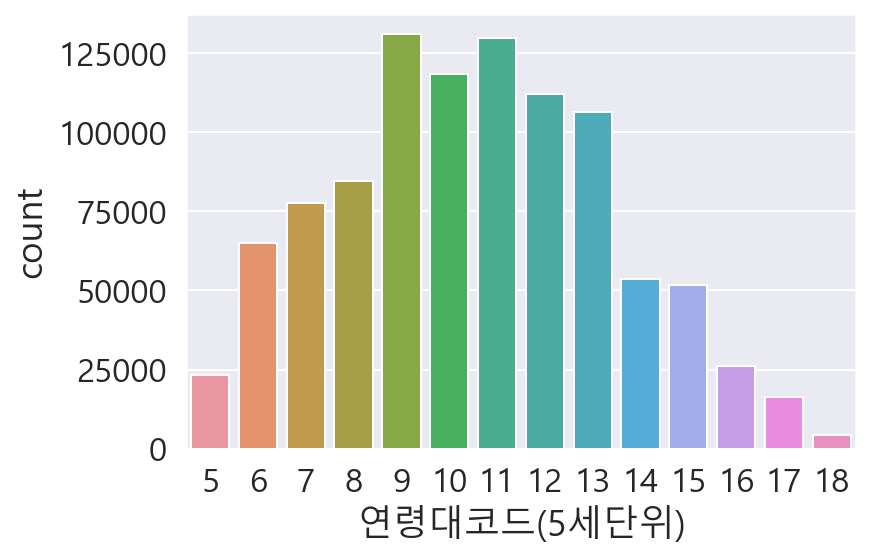

In [152]:
sns.countplot(data=df, x="연령대코드(5세단위)")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

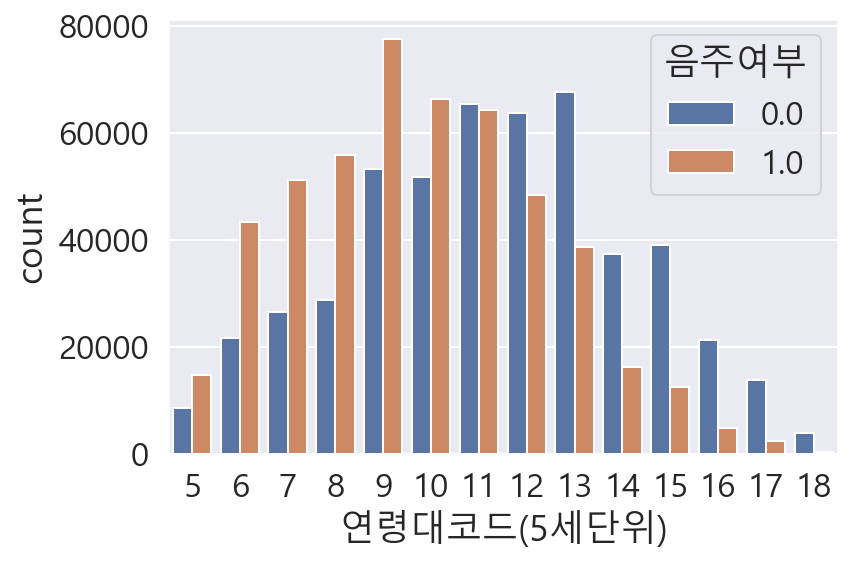

In [168]:
sns.countplot(data=df, x="연령대코드(5세단위)",hue = "음주여부")

# 14.3 countplot- 키와 몸무게

In [169]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5cm단위)")

ValueError: Could not interpret input '신장(5cm단위)'

<Figure size 1080x288 with 0 Axes>

In [164]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)")

ValueError: Could not interpret input '체중(5Kg단위)'

<Figure size 1080x288 with 0 Axes>

In [166]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Kg단위)", hue="성별코드")

ValueError: Could not interpret input '신장(5Kg단위)'

<Figure size 1080x288 with 0 Axes>

In [171]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")

ValueError: Could not interpret input '체중(5Kg단위)'

<Figure size 1080x288 with 0 Axes>

In [172]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

ValueError: Could not interpret input '체중(5Kg단위)'

<Figure size 1080x288 with 0 Axes>